In [ ]:
# MONTH - month(1-12)
# DAY_OF_MONTH - day(1-31)
# DAY_OF_WEEK - week-day(1-7)
# OP_UNIQUE_CARRIER - unique carrier code
# TAIL_NUM - aircraft tail num
# DEST - destination
# DEP_DELAY - delay in departure(obviously negative for early departure)
# CRS_ELAPSED_TIME - CRS elapsed time of flight(estimated elapsed time in minutes)
# DISTANCE - distance between origin and destination
# CRS_DEP_M - scheduled departure time
# DEP_TIME_M - actual departure time
# CRS_ARR_M - scheduled arrival time
# Temperature - temperature in Fahrenheit
# Dew Point - dew point
# Humidity - humidity
# Wind - several types of wind
# Wind Speed - speed in knots(M = missing)
# Wind Gust - sudden increase in speed of wind
# Pressure - pressure
# Condition - fair, windy, cloudy, etc
# sch_dep - count of scheduled departures
# sch_arr - count of scheduled arrivals
# TAXI_OUT - time elapsed b/w departure from the origin airport gate and wheels off, in minutes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [3]:
data = pd.read_csv('/home/aakash/Desktop/M1_final.csv')
print(data.shape)
data = data.dropna()
data = data.drop('TAIL_NUM',axis = 1) # have huge amount of unique values
print(data.shape)
data

(28820, 23)
(28818, 22)


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,CHS,-1,124,636,324,323,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,LAX,-7,371,2475,340,333,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,FLL,40,181,1069,301,341,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,MCO,-2,168,944,345,343,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,ATL,-4,139,760,360,356,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,ORH,2,57,150,1370,1372,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,BOS,2,75,187,1390,1392,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,SEA,283,392,2422,1125,1408,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,SJU,5,224,1598,1417,1422,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [4]:
data.select_dtypes(include=['object'])

,OP_UNIQUE_CARRIER,DEST,Dew Point,Wind,Condition
0,B6,CHS,34,W,Fair / Windy
1,B6,LAX,34,W,Fair / Windy
2,B6,FLL,34,W,Fair / Windy
3,B6,MCO,34,W,Fair / Windy
4,DL,ATL,32,W,Fair / Windy
...,...,...,...,...,...
28815,B6,ORH,38,N,Cloudy
28816,AA,BOS,38,N,Cloudy
28817,AS,SEA,38,N,Cloudy
28818,B6,SJU,38,N,Cloudy


In [5]:
data['Dew Point'].unique()

array(['34', '32', '33', '31', '30', '29', '67', '35', '36', '38', '39',
       '40', '41', '42', '28', '27', '46', '37', '44', '45', '52', '53',
       '54', '56', '57', '59', '58', '50', '43', '48', '49', '47', '21',
       '20', '22', '24', '23', '19', '18', '16', '13', '12', '14', '15',
       '17', '26', '25', '51', '55', '6\xa0', '9\xa0', '5\xa0', '8\xa0',
       '10', '4\xa0', '7\xa0', '3\xa0', '2\xa0', '11', '0\xa0', '-1',
       '1\xa0', '-2', '-3'], dtype=object)

In [6]:
data['Dew Point'] = data['Dew Point'].str.split("\xa0").str.join(" ").astype(int)
data['Dew Point'].unique()

array([34, 32, 33, 31, 30, 29, 67, 35, 36, 38, 39, 40, 41, 42, 28, 27, 46,
       37, 44, 45, 52, 53, 54, 56, 57, 59, 58, 50, 43, 48, 49, 47, 21, 20,
       22, 24, 23, 19, 18, 16, 13, 12, 14, 15, 17, 26, 25, 51, 55,  6,  9,
        5,  8, 10,  4,  7,  3,  2, 11,  0, -1,  1, -2, -3])

In [7]:
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols = pd.Series(categorical_cols)

## Linear Regression

In [8]:
def linear(x_train,y_train,x_test,y_test):
    from sklearn.linear_model import LinearRegression
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    rmse_linear = np.sqrt(mse(y_test, y_pred))
    
    return rmse_linear

## Ridge Regression

In [9]:
def ridge(x_train,y_train,x_test,y_test):
    from sklearn.linear_model import Ridge
    
    model = Ridge(alpha = 0.1)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    rmse_ridge= np.sqrt(mse(y_test,y_pred))
    
    return rmse_ridge

## Lasso Regression

In [10]:
from sklearn.linear_model import Lasso

def lasso(x_train,y_train,x_test,y_test):
    from sklearn.linear_model import Lasso
    
    model = Lasso(alpha = 0.01,max_iter = 10000)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    rmse_lasso = np.sqrt(mse(y_test,y_pred))
    
    return rmse_lasso

## KNN Model

In [11]:
def knn(x_train,y_train,x_test,y_test):
    from sklearn.neighbors import KNeighborsRegressor as knn
    
    accuracy = []
    neighbors = 0
    error = 1e+9
    
    for i in range(1,50):
        model = knn(n_neighbors = i)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        accuracy.append(mse(y_test,y_pred))
        if accuracy[-1] < error:
            error = accuracy[-1]
            neighbors = i
        
    plt.plot(accuracy)
    plt.title('KNN Model')
    plt.xlabel('No. of Neighbors')
    plt.ylabel('RMSE')
    
    model = knn(n_neighbors = neighbors)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    rmse_knn = np.sqrt(mse(y_test,y_pred))
    return rmse_knn

## SVR

In [12]:
def svr(x_train,y_train,x_test,y_test):
    from sklearn.svm import SVR
    
    model = SVR()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse_svr = np.sqrt(mse(y_test,y_pred))
    
    return rmse_svr

## Naive Bayes

In [13]:
def naiveBayes(x_train,y_train,x_test,y_test):
    from sklearn.naive_bayes import GaussianNB as nb
    
    model = nb()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse_nb = np.sqrt(mse(y_test,y_pred))
    
    return rmse_nb

## Random Forest 

In [14]:
def randomForest(x_train,y_train,x_test,y_test):
    from sklearn.ensemble import RandomForestRegressor as rf
    
    model = rf()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse_rf = np.sqrt(mse(y_test,y_pred))
    
    return rmse_rf

## Light GBM

In [15]:
def lightGBM(x_train,y_train,x_test,y_test):
    from lightgbm import LGBMRegressor as lgbm
    
    model = lgbm()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse_lgbm = np.sqrt(mse(y_test,y_pred))
    
    return rmse_lgbm

## Label Encoding for given Data

In [16]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['TAXI_OUT'],axis = 1), data['TAXI_OUT'], test_size=0.1)

In [17]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
for col in  categorical_cols:
    x_train[col] = label_encoder.fit_transform(x_train[col])
    x_test[col] = label_encoder.fit_transform(x_test[col])

In [18]:
min_xtrain = x_train.min()
max_xtrain = x_train.max()
x_train = (x_train - min_xtrain)/(max_xtrain - min_xtrain)

min_xtest = x_test.min()
max_xtest = x_test.max()
x_test = (x_test - min_xtest)/(max_xtest - min_xtest)

In [19]:
RMSE = []

In [20]:
RMSE.append(linear(x_train,y_train,x_test,y_test))

In [21]:
RMSE.append(ridge(x_train,y_train,x_test,y_test))

In [22]:
RMSE.append(lasso(x_train,y_train,x_test,y_test))

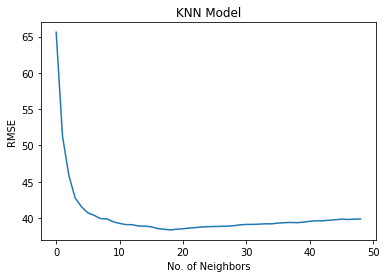

In [23]:
RMSE.append(knn(x_train,y_train,x_test,y_test))

In [24]:
RMSE.append(svr(x_train,y_train,x_test,y_test))

In [25]:
RMSE.append(naiveBayes(x_train,y_train,x_test,y_test))

In [26]:
RMSE.append(randomForest(x_train,y_train,x_test,y_test))

In [27]:
RMSE.append(lightGBM(x_train,y_train,x_test,y_test))

In [28]:
Algos = ['Linear Regression','Ridge Regression','Lasso Regression','KNN Model','SVR','Naive Bayes','Random Forest','Light GBM']
dict = {'Models': Algos, 'RMSE': RMSE }
df = pd.DataFrame(dict)
df

,Models,RMSE
0,Linear Regression,6.524729
1,Ridge Regression,6.525034
2,Lasso Regression,6.559770
3,KNN Model,6.193202
4,SVR,6.379522
5,Naive Bayes,9.171945
6,Random Forest,5.807041
7,Light GBM,5.881310


Text(0, 0.5, 'RMSE')

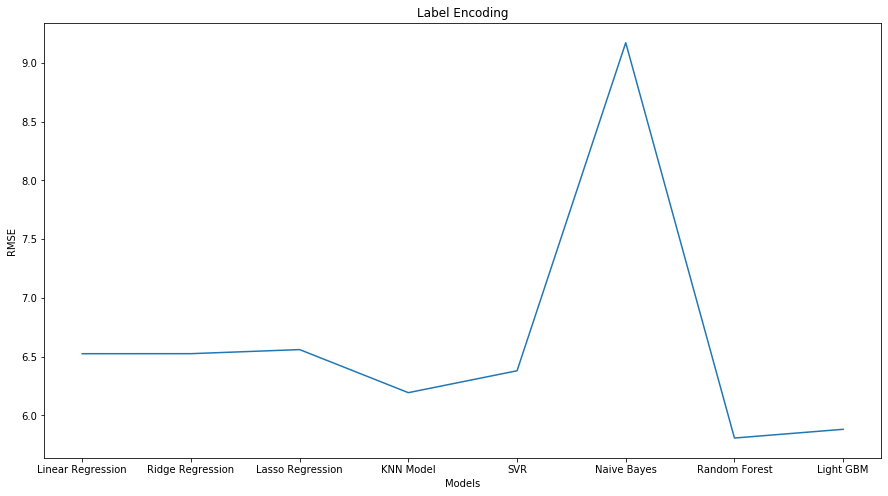

In [29]:
fig = plt.figure(figsize = (15,8))
plt.plot(Algos,RMSE)
plt.title('Label Encoding')
plt.xlabel('Models')
plt.ylabel('RMSE')

## One-Hot encoding for given Data

In [30]:
X = data

In [31]:
X = pd.get_dummies(X, columns = categorical_cols)
X = pd.get_dummies(X, columns = ['MONTH','DAY_OF_MONTH','DAY_OF_WEEK'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X.drop(['TAXI_OUT'],axis = 1), X['TAXI_OUT'], test_size=0.1)
x_test

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,...,DAY_OF_MONTH_29,DAY_OF_MONTH_30,DAY_OF_MONTH_31,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7
8620,-9,193,1074,449,440,642,46,45,96,3,...,0,0,0,0,0,1,0,0,0,0
18681,-8,178,1028,397,389,575,39,36,89,12,...,0,0,1,0,1,0,0,0,0,0
9594,-10,103,340,884,874,987,42,11,28,13,...,0,1,0,0,0,0,0,0,1,0
24352,-7,374,2248,1242,1235,1436,26,-3,28,16,...,0,0,0,0,0,0,0,1,0,0
28775,1,197,1069,1200,1201,1397,40,37,89,7,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22257,-4,172,944,685,681,857,54,51,90,21,...,0,0,0,0,0,0,0,0,1,0
15796,0,118,288,1200,1200,1318,33,29,85,3,...,0,0,0,0,0,0,0,0,1,0
21082,39,392,2429,1110,1149,1322,38,33,83,9,...,0,0,0,0,1,0,0,0,0,0
23238,22,169,740,764,786,873,46,37,71,7,...,0,0,0,0,1,0,0,0,0,0


In [32]:
RMSE_1 = []

In [33]:
RMSE_1.append(linear(x_train,y_train,x_test,y_test))

In [34]:
RMSE_1.append(ridge(x_train,y_train,x_test,y_test))

In [35]:
RMSE_1.append(lasso(x_train,y_train,x_test,y_test))

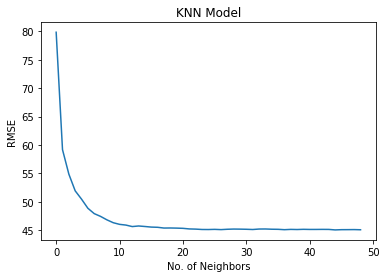

In [36]:
RMSE_1.append(knn(x_train,y_train,x_test,y_test))

In [37]:
RMSE_1.append(svr(x_train,y_train,x_test,y_test))

In [38]:
RMSE_1.append(naiveBayes(x_train,y_train,x_test,y_test))

In [39]:
RMSE_1.append(randomForest(x_train,y_train,x_test,y_test))

In [40]:
RMSE_1.append(lightGBM(x_train,y_train,x_test,y_test))

In [41]:
algos = ['Linear Regression','Ridge Regression','Lasso Regression','KNN Model','SVR','Naive Bayes','Random Forest','Light GBM']
dict = {'Models': Algos, 'RMSE': RMSE }
df = pd.DataFrame(dict)
df

,Models,RMSE
0,Linear Regression,6.524729
1,Ridge Regression,6.525034
2,Lasso Regression,6.559770
3,KNN Model,6.193202
4,SVR,6.379522
5,Naive Bayes,9.171945
6,Random Forest,5.807041
7,Light GBM,5.881310


Text(0, 0.5, 'RMSE')

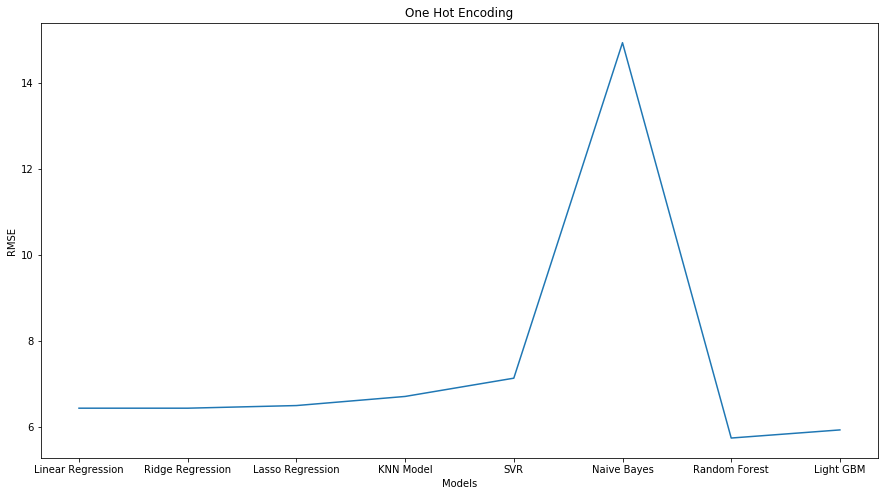

In [42]:
fig = plt.figure(figsize = (15,8))
plt.plot(algos,RMSE_1)
plt.title('One Hot Encoding')
plt.xlabel('Models')
plt.ylabel('RMSE')

<function matplotlib.pyplot.show(*args, **kw)>

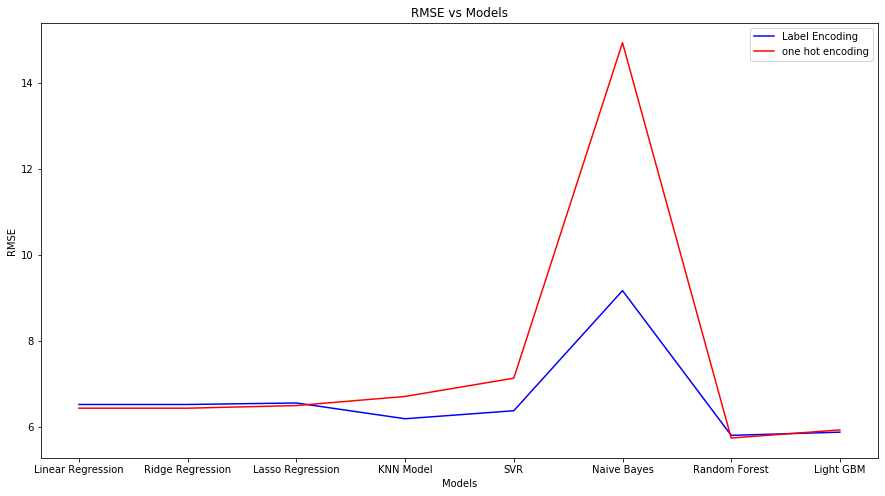

In [43]:
fig = plt.figure(figsize = (15,8))
plt.plot(algos,RMSE,"b",label="Label Encoding")
plt.plot(algos,RMSE_1,"r",label="one hot encoding")
plt.title("RMSE vs Models")
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.legend() 
plt.show

In [ ]:
# For given dataset, label encoding works better for most of the models.